In [70]:
#pip install textblob
#pip install spacy
#pip install afinn
#pip install wordcloud

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [72]:
# File paths
cleaned_tweet_file=os.path.join("..","Resources","outputData","tweetCleanData.csv")
pred_data_file = os.path.join("..","Resources","outputData","tweetPredData.csv")

In [73]:
# Load tweet csv file
tweet_df= pd.read_csv(cleaned_tweet_file)

In [74]:
# Display results - we will be using predTweet column to predict the sentiment
tweet_df.head()

,TweetID,Date,Matched Keywords,User,Source,Followers,Friends,Favorite,Tweet,predTweet,CleanedTweet
0,1292795662485131264,08/10/2020,Trump,MenshevikM,Twitter Web App,5882.0,320.0,0.0,They're even right that there's a certain kind of liberal who deeply wants a group of good Republicans to show up and say that Trump doesn't repre...,they are even right that there certain kind of liberal who deeply wants group of good republicans show up and say that trump does not represent th...,"['right', 'certain', 'liber', 'deeply', 'want', 'group', 'republican', 'trump', 'repress', 'forgot', 'liber', 'disappoint', 'radio', 'never', 'fuc..."
1,1292795661809852417,08/10/2020,Trump,balling_it,Twitter Web App,33.0,156.0,0.0,"@jonathanchait Saw, that is the press, people who encouraged voters to vote for Trump like Chait especially.",naw that the press people who encouraged voters vote for trump like chait especially,"['press', 'people', 'encourage', 'voter', 'trump', 'chait', 'espece']"
2,1292795659704242181,08/10/2020,Trump,laurie71,Twitter for iPhone,85.0,141.0,0.0,"@sarahcpr Trump signs an executive order to throw rotted scraps at the starving, sick and dying from his golf resort paid for by a starving, sick ...",trump signs an executive order throw rotted scraps the starving sick and dying from his golf resort paid for by starving sick and dying nation if ...,"['trump', 'sign', 'execute', 'order', 'throw', 'rot', 'scrap', 'start', 'die', 'resort', 'start', 'die', 'nation', 'rot', 'scrap', 'americawakeup'..."
3,1292795658747944960,08/10/2020,Biden,bluewave4peace,Twitter for iPhone,528.0,745.0,0.0,"@glennkirschner2 Sorry I want to be on a real team a truthful team ,a justice team ,a equality team =a winning team Bien 2020",sorry want be real team truthful team justice team equality team winning team bien,"['sorry', 'truth', 'justice', 'equal', 'win', 'bien']"
4,1292795658550812672,08/10/2020,Trump,OGOPer,Twitter for iPhone,2839.0,2655.0,0.0,Year. Until Ben Masse cowers and yelps before jumping into @realDonaldTrump’s lap again. Be very embarrassed #Nebraska. Your Up Senator is a #Trum...,yeah until ben sasse cowers and yelps before jumping into lap again be very embarrassed nebraska your senator trump lapdog,"['same', 'cower', 'yelp', 'before', 'jump', 'embarrass', 'nebraska', 'sent', 'trump', 'lapdog']"


### Method 1: VADER Sentiment Analysis:
- VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media. It is fully open-sourced under the MIT License[http://choosealicense.com/] 

In [75]:
# import SentimentIntensityAnalyzer class from vaderSentiment.vaderSentiment module. 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
  
# function to print sentiments 
# of the sentence. 
def getSentiment(sentence): 
  
    # Create a SentimentIntensityAnalyzer object. 
    sid_obj = SentimentIntensityAnalyzer() 
  
    # polarity_scores method of SentimentIntensityAnalyzer oject gives a sentiment dictionary which contains pos, neg, neu, and compound scores. 
    sentiment_dict = sid_obj.polarity_scores(sentence) 
  
    # decide sentiment as positive, negative and neutral 
    if sentiment_dict['compound'] >= 0.05 : 
        return "Positive"
  
    elif sentiment_dict['compound'] <= - 0.05 : 
        return "Negative"
  
    else : 
        return "Neutral"
  

In [76]:
# Get predictions
tweet_df['Prediction']=tweet_df['predTweet'].apply(str).apply(lambda x: getSentiment(x))

In [77]:
# Display size for df
pd.set_option('display.max_colwidth', 150)

In [78]:
# Display results
tweet_df[['Matched Keywords','predTweet','Prediction']]

,Matched Keywords,predTweet,Prediction
0,Trump,they are even right that there certain kind of liberal who deeply wants group of good republicans show up and say that trump does not represent th...,Negative
1,Trump,naw that the press people who encouraged voters vote for trump like chait especially,Positive
2,Trump,trump signs an executive order throw rotted scraps the starving sick and dying from his golf resort paid for by starving sick and dying nation if ...,Negative
3,Biden,sorry want be real team truthful team justice team equality team winning team bien,Positive
4,Trump,yeah until ben sasse cowers and yelps before jumping into lap again be very embarrassed nebraska your senator trump lapdog,Negative
...,...,...,...
89159,Trump,president trump needs go ahead and move paler when he does all of his supporters will follow so sick of twitter,Negative
89160,Trump,love this and get furious liberals who slam trump children they are all amazing people,Positive
89161,Trump,trump was able ascend the presidency through trojan horse provided him by russia bc we live in country that only measures success by its economy w...,Negative
89162,Trump,not article about why christians follow trump,Neutral


In [79]:
tweet_df["predTweet"]= tweet_df["predTweet"].replace('bien', "biden") 
tweet_df["CleanedTweet"]= tweet_df["CleanedTweet"].replace('bien', "biden") 

In [12]:
# Save data
tweet_df.to_csv(pred_data_file,index=False)

In [80]:
TrumpTweets=tweet_df[tweet_df['Matched Keywords']=='Trump']
BidenTweets =tweet_df[tweet_df['Matched Keywords']=='Biden']

In [81]:
TrumpCount=len(TrumpTweets['Prediction'])
BidenCount=len(BidenTweets['Prediction'])

In [82]:
# Function to caluclate % of sentiments
def percentage(part,whole):
    return 100 * float(part)/float(whole)

In [83]:
# Intital counter for sentiment
positive=0
negative=0
neutral=0

In [84]:
def getSentiments(tag,tweets,count):
    # reset counter for sentiment
    positive=0
    negative=0
    neutral=0
    positive_per=0
    neutral_per=0
    negative_per=0
    
    # Loop through tweets and get sentiment polarity
    for pred in tweets:
        
        if(pred =='Positive'):
            positive+=1
        elif(pred =='Negative'):
            negative+=1
        else:
            neutral+=1
            
    
    positive_per = format(percentage(positive,count),'.2f')
    neutral_per = format(percentage(neutral,count),'.2f')
    negative_per = format(percentage(negative,count),'.2f')

    # Preapre labels
    labels =[f'Positive [{str(positive_per)}%]',
             f'Neutral [{str(neutral_per)}%]',
             f'Negative [{str(negative_per)}%]']
    # Sizes
    sizes=[positive,neutral,negative]
    # Colors
    colors=['yellowgreen','gold','red']
    
    #Explode
    explode = (0.1, 0, 0)  # explode 1st slice
    
    fig = plt.figure(figsize=[6,6])
    ax = fig.add_subplot(111)
    
    # Draw pie chart to show sentiments for the tweets
    #patches,text=plt.pie(sizes,colors=colors,startangle=90)
    plt.pie(sizes, labels=labels, colors=colors,explode=explode,
            shadow=True, startangle=140, autopct='%1.0f%%', labeldistance=1.2)
    plt.title("Tweet sentiment for " + tag )
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

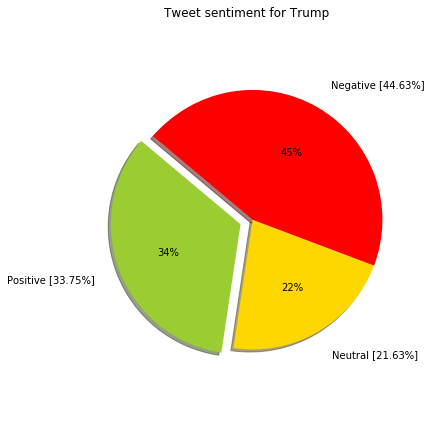

In [85]:
getSentiments("Trump", TrumpTweets['Prediction'],TrumpCount)

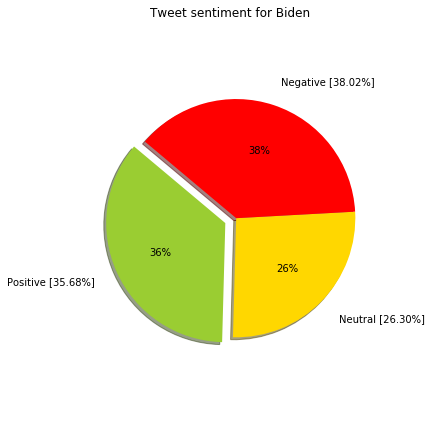

In [86]:
getSentiments("Biden", BidenTweets['Prediction'],BidenCount)

#### We can get a good idea of general sentiment statistics across different tweet categories. Looks like the average sentiment is  negative for Trump and reasonably positive for Biden! 

In [87]:
# creating instance of labelencoder
labelencoder = LabelEncoder()

In [88]:
tweet_df['encodePrediction'] = labelencoder.fit_transform(tweet_df['Prediction'])

C:\Users\anuaj\Anaconda3\envs\PythonData2020_1\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


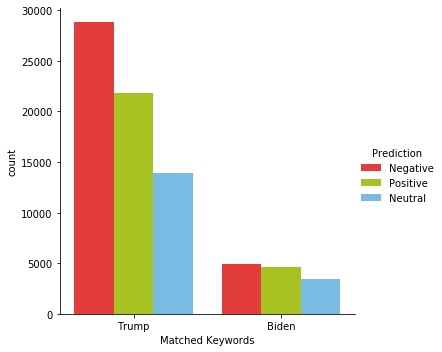

In [89]:
fc = sns.factorplot(x="Matched Keywords", hue="Prediction", 
                    data=tweet_df, kind="count", 
                    palette={"Negative": "#FE2020", 
                             "Positive": "#BADD07", 
                             "Neutral": "#68BFF5"})

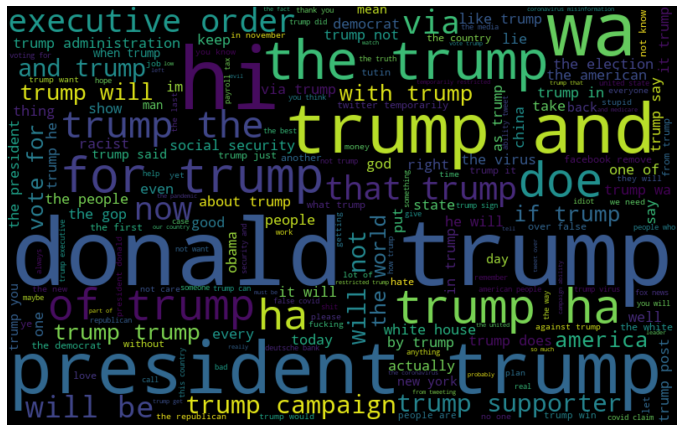

In [90]:
all_words = ' '.join([text for text in TrumpTweets['predTweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=420, max_font_size=110).generate(all_words)

plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

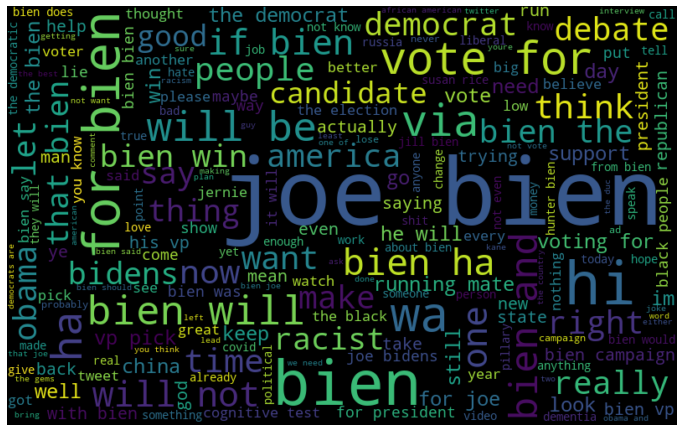

In [92]:
all_words = ' '.join([text for text in BidenTweets['predTweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=420, max_font_size=110).generate(all_words)

plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [121]:
#Vectorization for Data Visualization
from sklearn.feature_extraction.text import CountVectorizer
def vectorization(table):
    #CountVectorizer will convert a collection of text documents to a matrix of token counts
    #Produces a sparse representation of the counts 
    #Initialize
    vector = CountVectorizer()
    #We fit and transform the vector created
    frequency_matrix = vector.fit_transform(table["CleanedTweet"].apply(str))
    #Sum all the frequencies for each word
    sum_frequencies = np.sum(frequency_matrix, axis=0)
    #Now we use squeeze to remove single-dimensional entries from the shape of an array that we got from applying np.asarray to
    #the sum of frequencies.
    frequency = np.squeeze(np.asarray(sum_frequencies))
    #Now we get into a dataframe all the frequencies and the words that they correspond to
    frequency_df = pd.DataFrame([frequency], columns=vector.get_feature_names()).transpose()
    return frequency_df

In [122]:
word_frequency =vectorization(tweet_df)

In [123]:
def graph(word_frequency, sent):
    labels = word_frequency[0][1:51].index
    title = "Word Frequency for %s" %sent
    #Plot the figures
    plt.figure(figsize=(10,5))
    plt.bar(np.arange(50), word_frequency[0][1:51], width = 0.8, 
            color = sns.color_palette("bwr"), alpha=0.5, 
            edgecolor = "black", capsize=8, linewidth=1);
    plt.xticks(np.arange(50), labels, rotation=90, size=14);
    plt.xlabel("50 more frequent words", size=14);
    plt.ylabel("Frequency", size=14);
    #plt.title('Word Frequency for %s', size=18) %sent;
    plt.title(title, size=18)
    plt.grid(False);
    plt.gca().spines["top"].set_visible(False);
    plt.gca().spines["right"].set_visible(False);
    plt.show() 

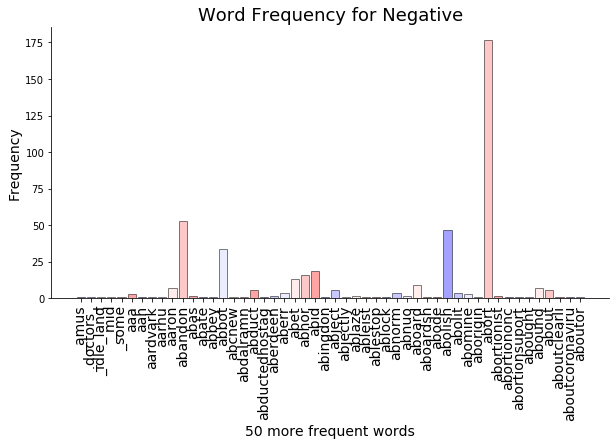

In [124]:
graph(word_frequency, "Negative")